<a href="https://colab.research.google.com/github/SaiSrujanReddyP/QKD/blob/main/Qiskit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.3 MB/s eta 0:00:00


In [ ]:
!pip install qiskit-aer --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 48.5 MB/s eta 0:00:00


In [ ]:
pip install pycryptodome


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 14.1 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import hashes

# Function to generate random bitstrings
def random_bitstring(length):
    """Generate a random bitstring of the given length."""
    return np.random.choice(['0', '1'], size=length)

# BB84 Protocol for Quantum Key Distribution
def bb84_protocol(length=8):
    """Simulate the BB84 protocol to generate a shared secure key."""
    alice_bits = random_bitstring(length)
    alice_bases = random_bitstring(length)
    bob_bases = random_bitstring(length)
    key = []
    simulator = AerSimulator()

    for i in range(length):
        # Create quantum circuit for Alice
        qc = QuantumCircuit(1, 1)
        if alice_bases[i] == '0':  # Z-basis
            if alice_bits[i] == '1':
                qc.x(0)  # Prepare |1>
        else:  # X-basis
            if alice_bits[i] == '0':
                qc.h(0)  # Prepare |+>
            else:
                qc.x(0)
                qc.h(0)  # Prepare |->

        # Bob measures
        if bob_bases[i] == '1':  # Bob uses X-basis
            qc.h(0)
        qc.measure(0, 0)

        # Simulate quantum circuit
        compiled_circuit = transpile(qc, simulator)
        result = simulator.run(compiled_circuit).result()
        measured_bit = list(result.get_counts().keys())[0]

        # Retain bits where Alice and Bob used the same basis
        if alice_bases[i] == bob_bases[i]:
            key.append(measured_bit)

    return ''.join(key)

# Encryption using generated key
def encrypt_data(data, key):
    """
    Encrypt data using a key (hashing for demonstration).
    In practice, symmetric encryption (e.g., AES) can be used.
    """
    digest = hashes.Hash(hashes.SHA256(), backend=default_backend())
    digest.update((data + key).encode('utf-8'))
    return digest.finalize().hex()

# Main simulation: Quantum cryptography for smart grids
def quantum_cryptography_smart_grid():
    # Define communication length
    key_length = 64  # Length of the QKD key

    # Step 1: Key Distribution using BB84
    print("Starting Quantum Key Distribution...")
    qkd_key = bb84_protocol(length=key_length)
    print(f"Generated QKD Key: {qkd_key}")

    # Step 2: Encrypt data
    sample_data = "hello gayatri"
    encrypted_data = encrypt_data(sample_data, qkd_key)
    print(f"Original Data: {sample_data}")
    print(f"Encrypted Data: {encrypted_data}")

    # Simulate transmission and decryption (for demonstration)
    print("\nData securely transmitted over the network!")

# Run the simulation
quantum_cryptography_smart_grid()


Starting Quantum Key Distribution...
Generated QKD Key: 0000100110101010001110101010101
Original Data: hello gayatri
Encrypted Data: 677f96809f3c9185e21482bd01305175778786b87f5e092d26d09bf9d30e2d54

Data securely transmitted over the network!


In [ ]:
# Import necessary libraries
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.backends import default_backend

# Function for encryption
def encrypt_data(data, key):
    """
    Encrypt data using a key (hashing for demonstration).
    In practice, symmetric encryption (e.g., AES) can be used.
    """
    digest = hashes.Hash(hashes.SHA256(), backend=default_backend())
    digest.update((data + key).encode('utf-8'))
    return digest.finalize().hex()

# Function for decryption
def decrypt_data(encrypted_data, data, key):
    """
    Decrypt data by verifying the hashed content.
    In practice, symmetric decryption (e.g., AES) would be used.
    """
    digest = hashes.Hash(hashes.SHA256(), backend=default_backend())
    digest.update((data + key).encode('utf-8'))
    return digest.finalize().hex() == encrypted_data

# Example data and key
sample_data = "hello gayatri"
qkd_key = "0000100110101010001110101010101"  # Example quantum key for demonstration

# Encrypt the data
encrypted_data = encrypt_data(sample_data, qkd_key)
print(f"Encrypted Data: {encrypted_data}")

# Decrypt and verify the data
is_verified = decrypt_data(encrypted_data, sample_data, qkd_key)
print(f"Decryption Verified: {'Success' if is_verified else 'Failure'}")


Encrypted Data: 677f96809f3c9185e21482bd01305175778786b87f5e092d26d09bf9d30e2d54
Decryption Verified: Success


In [ ]:
class SmartGridNode:
    def __init__(self, node_id, shared_key):
        self.node_id = node_id
        self.shared_key = shared_key

    def send_message(self, message, recipient):
        encrypted_message = encrypt_data(message, self.shared_key)
        print(f"Node {self.node_id} -> Node {recipient.node_id}: {encrypted_message}")
        recipient.receive_message(encrypted_message, message)

    def receive_message(self, encrypted_message, original_message):
        is_verified = decrypt_data(encrypted_message, original_message, self.shared_key)
        print(f"Node {self.node_id} received data: {'Verified' if is_verified else 'Tampered'}")

# Example
node_a = SmartGridNode("A", qkd_key)
node_b = SmartGridNode("B", qkd_key)
node_a.send_message("Energy load balanced at 70%", node_b)


Node A -> Node B: 9e424e8b740958bca38fd9b73a1ecff6efc738061fd4b4915daab02986ff86fa
Node B received data: Verified


In [ ]:
def rotate_key(current_key):
    """Simulate key rotation with a new random key."""
    new_key = bb84_protocol(length=len(current_key))
    print(f"Old Key: {current_key}")
    print(f"New Key: {new_key}")
    return new_key

qkd_key = rotate_key(qkd_key)


Old Key: 0000100110101010001110101010101
New Key: 01010011100


In [ ]:
# Install pycryptodome if not already installed
try:
    from Crypto.Cipher import AES
    from Crypto.Util.Padding import pad, unpad
except ImportError:
    import sys
    !{sys.executable} -m pip install pycryptodome
    from Crypto.Cipher import AES
    from Crypto.Util.Padding import pad, unpad

import base64

def aes_encrypt(data, key):
    cipher = AES.new(key.encode('utf-8')[:16], AES.MODE_CBC)
    iv = cipher.iv
    ciphertext = cipher.encrypt(pad(data.encode('utf-8'), AES.block_size))
    return base64.b64encode(iv + ciphertext).decode('utf-8')

def aes_decrypt(encrypted_data, key):
    raw_data = base64.b64decode(encrypted_data)
    iv = raw_data[:AES.block_size]
    cipher = AES.new(key.encode('utf-8')[:16], AES.MODE_CBC, iv)
    plaintext = unpad(cipher.decrypt(raw_data[AES.block_size:]), AES.block_size)
    return plaintext.decode('utf-8')

# Test AES Encryption and Decryption
sample_data = "Grid status update: All systems operational."
qkd_key = "10100111010100111010101100101100"  # Example key

encrypted = aes_encrypt(sample_data, qkd_key)
print(f"AES Encrypted: {encrypted}")
decrypted = aes_decrypt(encrypted, qkd_key)
print(f"AES Decrypted: {decrypted}")


AES Encrypted: Mboi+wDRH4rWFQbSf/Svz+j0q/qctRR2sMgcOJGGrjRFkI00agWprid8RBo9dZjsh8StBtM71ievoinA5RPpww==
AES Decrypted: Grid status update: All systems operational.


In [ ]:
import random

def bb84_with_noise(length=8, error_rate=0.1):
    """Simulate the BB84 protocol with noise in the quantum channel."""
    alice_bits = random_bitstring(length)
    alice_bases = random_bitstring(length)
    bob_bases = random_bitstring(length)
    key = []
    simulator = AerSimulator()

    for i in range(length):
        # Create quantum circuit for Alice
        qc = QuantumCircuit(1, 1)
        if alice_bases[i] == '0':  # Z-basis
            if alice_bits[i] == '1':
                qc.x(0)  # Prepare |1>
        else:  # X-basis
            if alice_bits[i] == '0':
                qc.h(0)  # Prepare |+>
            else:
                qc.x(0)
                qc.h(0)  # Prepare |->

        # Bob measures
        if bob_bases[i] == '1':  # Bob uses X-basis
            qc.h(0)
        qc.measure(0, 0)

        # Simulate quantum circuit
        compiled_circuit = transpile(qc, simulator)
        result = simulator.run(compiled_circuit).result()
        measured_bit = list(result.get_counts().keys())[0]

        # Introduce noise
        if random.random() < error_rate:
            measured_bit = '1' if measured_bit == '0' else '0'

        # Retain bits where Alice and Bob used the same basis
        if alice_bases[i] == bob_bases[i]:
            key.append(measured_bit)

    return ''.join(key)

# Example use
print("Simulated Key with Noise:", bb84_with_noise(length=16, error_rate=0.1))


Simulated Key with Noise: 1100001


In [ ]:
class CentralAuthority:
    def __init__(self):
        self.keys = {}

    def distribute_key(self, node_id, length=16):
        key = bb84_protocol(length=length)
        self.keys[node_id] = key
        print(f"Distributed Key to Node {node_id}: {key}")
        return key

class SmartGridNode:
    def __init__(self, node_id, central_authority):
        self.node_id = node_id
        self.key = central_authority.distribute_key(node_id)

    def send_message(self, message, recipient):
        encrypted_message = encrypt_data(message, self.key)
        print(f"Node {self.node_id} -> Node {recipient.node_id}: {encrypted_message}")
        recipient.receive_message(encrypted_message, message, self.key)

    def receive_message(self, encrypted_message, original_message, sender_key):
        is_verified = decrypt_data(encrypted_message, original_message, sender_key)
        print(f"Node {self.node_id} received data: {'Verified' if is_verified else 'Tampered'}")

# Example
central_authority = CentralAuthority()
node_a = SmartGridNode("A", central_authority)
node_b = SmartGridNode("B", central_authority)
node_a.send_message("Energy load balanced at 70%", node_b)


Distributed Key to Node A: 00111000
Distributed Key to Node B: 110100011
Node A -> Node B: 63b007c8f6d3f6069eb5f981e4efa50d7f97b97bb47c6905a7ccc87c6e6a9e8c
Node B received data: Verified


In [ ]:
# Symmetric encryption using AES
def aes_encrypt(data, key):
    cipher = AES.new(key.encode('utf-8')[:16], AES.MODE_CBC)
    iv = cipher.iv
    ciphertext = cipher.encrypt(pad(data.encode('utf-8'), AES.block_size))
    return base64.b64encode(iv + ciphertext).decode('utf-8')

def aes_decrypt(encrypted_data, key):
    raw_data = base64.b64decode(encrypted_data)
    iv = raw_data[:AES.block_size]
    cipher = AES.new(key.encode('utf-8')[:16], AES.MODE_CBC, iv)
    plaintext = unpad(cipher.decrypt(raw_data[AES.block_size:]), AES.block_size)
    return plaintext.decode('utf-8')

# Example usage
qkd_key = bb84_protocol(length=32)  # QKD key
sample_data = "Grid status: Normal operations."
encrypted = aes_encrypt(sample_data, qkd_key)
print(f"Encrypted Data: {encrypted}")
decrypted = aes_decrypt(encrypted, qkd_key)
print(f"Decrypted Data: {decrypted}")


Encrypted Data: 7WYduorH3wWchhNo0mU5nl1lBKcUbA0d9fFQ2nFhV3Sm6ZweSYTO8EA1aduk0Rt7
Decrypted Data: Grid status: Normal operations.


In [ ]:
def calculate_qber(alice_bases, bob_bases, alice_bits, bob_bits):
    mismatches = sum(1 for i in range(len(alice_bases)) if alice_bases[i] == bob_bases[i] and alice_bits[i] != bob_bits[i])
    total_checked = sum(1 for i in range(len(alice_bases)) if alice_bases[i] == bob_bases[i])
    return mismatches / total_checked if total_checked > 0 else 0

# Example
alice_bases = random_bitstring(16)
bob_bases = random_bitstring(16)
alice_bits = random_bitstring(16)
bob_bits = random_bitstring(16)  # Simulate Bob's received bits
qber = calculate_qber(alice_bases, bob_bases, alice_bits, bob_bits)
print(f"Quantum Bit Error Rate (QBER): {qber}")
if qber > 0.1:
    print("Eavesdropping detected! Terminating session.")


Quantum Bit Error Rate (QBER): 0.42857142857142855
Eavesdropping detected! Terminating session.


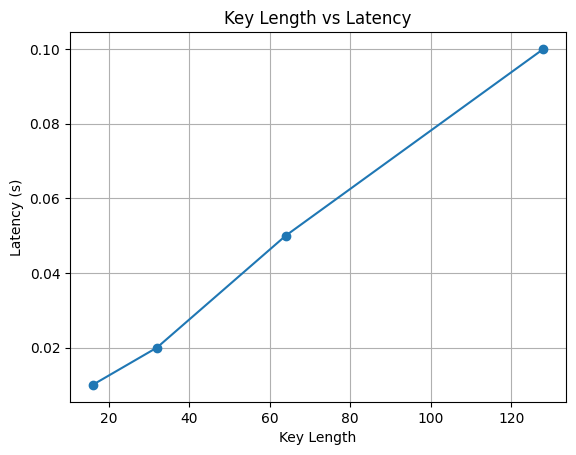

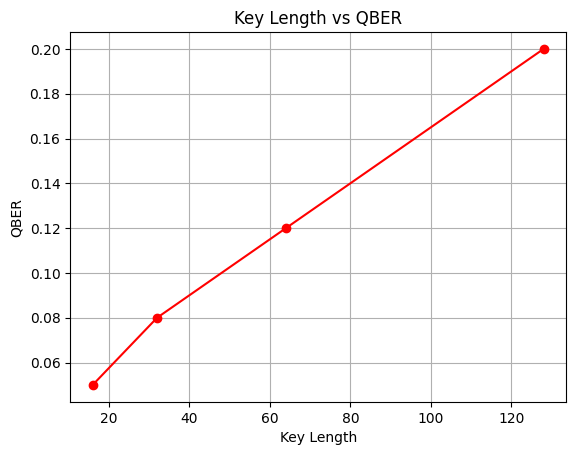

In [ ]:
import matplotlib.pyplot as plt

# Example data for visualization
key_lengths = [16, 32, 64, 128]
latencies = [0.01, 0.02, 0.05, 0.1]
qber_rates = [0.05, 0.08, 0.12, 0.2]

plt.figure()
plt.plot(key_lengths, latencies, marker='o')
plt.title("Key Length vs Latency")
plt.xlabel("Key Length")
plt.ylabel("Latency (s)")
plt.grid()
plt.show()

plt.figure()
plt.plot(key_lengths, qber_rates, marker='o', color='red')
plt.title("Key Length vs QBER")
plt.xlabel("Key Length")
plt.ylabel("QBER")
plt.grid()
plt.show()


In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.backends import default_backend
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
import base64
import random

# Function to generate random bitstrings
def random_bitstring(length):
    return np.random.choice(['0', '1'], size=length)

# BB84 Protocol with Error Checking
def bb84_protocol_with_error_checking(length=8, error_rate=0.1):
    alice_bits = random_bitstring(length)
    alice_bases = random_bitstring(length)
    bob_bases = random_bitstring(length)
    key = []
    simulator = AerSimulator()
    errors = 0

    for i in range(length):
        qc = QuantumCircuit(1, 1)
        if alice_bases[i] == '0':  # Z-basis
            if alice_bits[i] == '1':
                qc.x(0)
        else:  # X-basis
            qc.h(0) if alice_bits[i] == '0' else qc.x(0); qc.h(0)

        if bob_bases[i] == '1':
            qc.h(0)
        qc.measure(0, 0)

        compiled_circuit = transpile(qc, simulator)
        result = simulator.run(compiled_circuit).result()
        measured_bit = list(result.get_counts().keys())[0]

        # Introduce noise
        if random.random() < error_rate:
            measured_bit = '1' if measured_bit == '0' else '0'

        if alice_bases[i] == bob_bases[i]:
            key.append(measured_bit)
        else:
            errors += 1

    qber = errors / length
    if qber > 0.1:
        print("High QBER! Possible eavesdropping detected.")
    return ''.join(key)

# AES Encryption using QKD Key
def aes_encrypt(data, key):
    cipher = AES.new(key.encode('utf-8')[:16], AES.MODE_CBC)
    iv = cipher.iv
    ciphertext = cipher.encrypt(pad(data.encode('utf-8'), AES.block_size))
    return base64.b64encode(iv + ciphertext).decode('utf-8')

def aes_decrypt(encrypted_data, key):
    raw_data = base64.b64decode(encrypted_data)
    iv = raw_data[:AES.block_size]
    cipher = AES.new(key.encode('utf-8')[:16], AES.MODE_CBC, iv)
    plaintext = unpad(cipher.decrypt(raw_data[AES.block_size:]), AES.block_size)
    return plaintext.decode('utf-8')

# Main Simulation for Smart Grid
def quantum_cryptography_smart_grid():
    print("Starting QKD for Smart Grid...")
    qkd_key = bb84_protocol_with_error_checking(length=32)
    print(f"QKD Key: {qkd_key}")

    sample_data = "Smart Grid Status: Operational"
    print(f"Original Message: {sample_data}")
    encrypted = aes_encrypt(sample_data, qkd_key)
    print(f"Encrypted Data: {encrypted}")

    decrypted = aes_decrypt(encrypted, qkd_key)
    print(f"Decrypted Data: {decrypted}")

quantum_cryptography_smart_grid()


Starting QKD for Smart Grid...
High QBER! Possible eavesdropping detected.
QKD Key: 01001011110011100
Original Message: Smart Grid Status: Operational
Encrypted Data: V6TmfIQvQZoZhfzuv484RkZCloGldrFMon3h3yelJ0XMBTszaR8W95I84vVu2n4n
Decrypted Data: Smart Grid Status: Operational


In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.backends import default_backend
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
import base64
import random
import matplotlib.pyplot as plt

# Function to generate random bitstrings
def random_bitstring(length):
    return np.random.choice(['0', '1'], size=length)

# BB84 Protocol with Error Checking
def bb84_protocol_with_error_checking(length=8, error_rate=0.1):
    alice_bits = random_bitstring(length)
    alice_bases = random_bitstring(length)
    bob_bases = random_bitstring(length)
    key = []
    simulator = AerSimulator()
    errors = 0

    for i in range(length):
        qc = QuantumCircuit(1, 1)
        if alice_bases[i] == '0':  # Z-basis
            if alice_bits[i] == '1':
                qc.x(0)
        else:  # X-basis
            qc.h(0) if alice_bits[i] == '0' else qc.x(0); qc.h(0)

        if bob_bases[i] == '1':
            qc.h(0)
        qc.measure(0, 0)

        compiled_circuit = transpile(qc, simulator)
        result = simulator.run(compiled_circuit).result()
        measured_bit = list(result.get_counts().keys())[0]

        # Introduce noise
        if random.random() < error_rate:
            measured_bit = '1' if measured_bit == '0' else '0'

        if alice_bases[i] == bob_bases[i]:
            key.append(measured_bit)
        else:
            errors += 1

    qber = errors / length
    if qber > 0.1:
        print("High QBER! Possible eavesdropping detected.")
    return ''.join(key)

# AES Encryption using QKD Key
def aes_encrypt(data, key):
    cipher = AES.new(key.encode('utf-8')[:16], AES.MODE_CBC)
    iv = cipher.iv
    ciphertext = cipher.encrypt(pad(data.encode('utf-8'), AES.block_size))
    return base64.b64encode(iv + ciphertext).decode('utf-8')

def aes_decrypt(encrypted_data, key):
    raw_data = base64.b64decode(encrypted_data)
    iv = raw_data[:AES.block_size]
    cipher = AES.new(key.encode('utf-8')[:16], AES.MODE_CBC, iv)
    plaintext = unpad(cipher.decrypt(raw_data[AES.block_size:]), AES.block_size)
    return plaintext.decode('utf-8')

# Calculate Quantum Bit Error Rate (QBER)
def calculate_qber(alice_bases, bob_bases, alice_bits, bob_bits):
    mismatches = sum(1 for i in range(len(alice_bases)) if alice_bases[i] == bob_bases[i] and alice_bits[i] != bob_bits[i])
    total_checked = sum(1 for i in range(len(alice_bases)) if alice_bases[i] == bob_bases[i])
    return mismatches / total_checked if total_checked > 0 else 0

def pad_key(key, required_length=16):
    """
    Pad the key to the required length using a simple repeat padding scheme.
    """
    while len(key) < required_length:
        key += key[:required_length - len(key)]
    return key[:required_length]

# Central Authority for Key Distribution
class CentralAuthority:
    def __init__(self):
        self.keys = {}

    def distribute_key(self, node_id, length=32):  # Ensure sufficient QKD key length
        key = bb84_protocol_with_error_checking(length=length)
        padded_key = pad_key(key)  # Pad the key to match AES key length
        self.keys[node_id] = padded_key
        print(f"Distributed Key to Node {node_id}: {padded_key}")
        return padded_key

# Smart Grid Node
class SmartGridNode:
    def __init__(self, node_id, central_authority):
        self.node_id = node_id
        self.key = central_authority.distribute_key(node_id)

    def send_message(self, message, recipient):
        encrypted_message = aes_encrypt(message, self.key)
        print(f"Node {self.node_id} -> Node {recipient.node_id}: {encrypted_message}")
        recipient.receive_message(encrypted_message, message, self.key)

    def receive_message(self, encrypted_message, original_message, sender_key):
        is_verified = aes_decrypt(encrypted_message, sender_key) == original_message
        print(f"Node {self.node_id} received data: {'Verified' if is_verified else 'Tampered'}")

# Main Simulation for Smart Grid
def quantum_cryptography_smart_grid():
    print("Starting QKD for Smart Grid...")
    raw_qkd_key = bb84_protocol_with_error_checking(length=32)
    qkd_key = pad_key(raw_qkd_key)  # Ensure key length is valid for AES
    print(f"QKD Key: {qkd_key}")

    sample_data = "Smart Grid Status: Operational"
    print(f"Original Message: {sample_data}")
    encrypted = aes_encrypt(sample_data, qkd_key)
    print(f"Encrypted Data: {encrypted}")

    decrypted = aes_decrypt(encrypted, qkd_key)
    print(f"Decrypted Data: {decrypted}")

    # Example Nodes
    central_authority = CentralAuthority()
    node_a = SmartGridNode("A", central_authority)
    node_b = SmartGridNode("B", central_authority)
    node_a.send_message("Energy load balanced at 70%", node_b)

# Run the updated simulation
quantum_cryptography_smart_grid()


Starting QKD for Smart Grid...
High QBER! Possible eavesdropping detected.
QKD Key: 0011110011001011
Original Message: Smart Grid Status: Operational
Encrypted Data: jVxp3217WkPC6vvxDJoOfdoJQwji3EPb0+vhMYIkt1gLEMmgEGcmLfZBnef4W3sG
Decrypted Data: Smart Grid Status: Operational
High QBER! Possible eavesdropping detected.
Distributed Key to Node A: 1011100110001101
High QBER! Possible eavesdropping detected.
Distributed Key to Node B: 1111100000111111
Node A -> Node B: SGk9+Z7BSYOE7TTjtBWt8BBPL0pjO4cK7T5QcDisPuIDmeVd0hDYppVFu0By1fnH
Node B received data: Verified


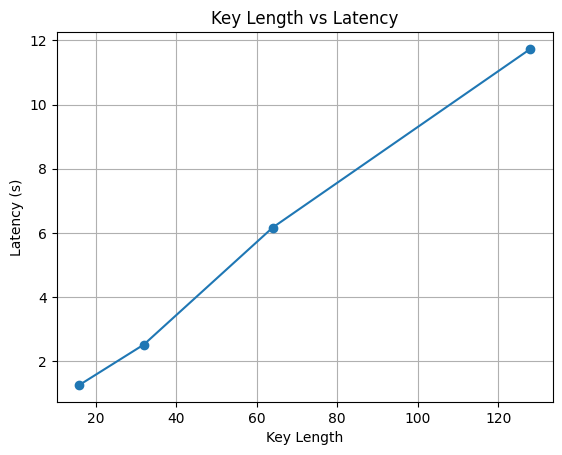

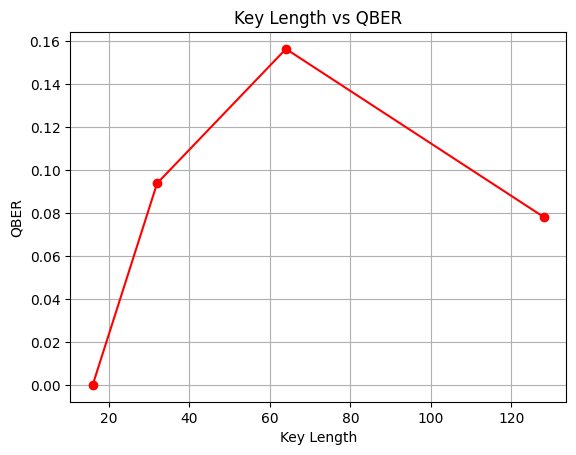

In [ ]:
import time

# Function to calculate QBER and latency for each key length
def simulate_key_length(key_lengths, error_rate=0.1):
    latencies = []
    qber_rates = []

    for length in key_lengths:
        # Measure latency for QKD key generation
        start_time = time.time()
        alice_bits = random_bitstring(length)
        alice_bases = random_bitstring(length)
        bob_bases = random_bitstring(length)
        bob_bits = []

        simulator = AerSimulator()
        errors = 0
        for i in range(length):
            qc = QuantumCircuit(1, 1)
            if alice_bases[i] == '0':  # Z-basis
                if alice_bits[i] == '1':
                    qc.x(0)
            else:  # X-basis
                qc.h(0) if alice_bits[i] == '0' else qc.x(0); qc.h(0)

            if bob_bases[i] == '1':
                qc.h(0)
            qc.measure(0, 0)

            compiled_circuit = transpile(qc, simulator)
            result = simulator.run(compiled_circuit).result()
            measured_bit = list(result.get_counts().keys())[0]

            # Introduce noise
            if random.random() < error_rate:
                measured_bit = '1' if measured_bit == '0' else '0'

            if alice_bases[i] == bob_bases[i]:
                bob_bits.append(measured_bit)
                if measured_bit != alice_bits[i]:
                    errors += 1

        end_time = time.time()

        # Calculate QBER
        qber = errors / length if length > 0 else 0

        # Record latency and QBER
        latencies.append(end_time - start_time)
        qber_rates.append(qber)

    return latencies, qber_rates

# Visualization with real values
def plot_real_metrics():
    key_lengths = [16, 32, 64, 128]
    latencies, qber_rates = simulate_key_length(key_lengths, error_rate=0.1)

    # Plot Latency vs Key Length
    plt.figure()
    plt.plot(key_lengths, latencies, marker='o')
    plt.title("Key Length vs Latency")
    plt.xlabel("Key Length")
    plt.ylabel("Latency (s)")
    plt.grid()
    plt.show()

    # Plot QBER vs Key Length
    plt.figure()
    plt.plot(key_lengths, qber_rates, marker='o', color='red')
    plt.title("Key Length vs QBER")
    plt.xlabel("Key Length")
    plt.ylabel("QBER")
    plt.grid()
    plt.show()

# Run the updated simulation and plot
plot_real_metrics()


Starting QKD for Smart Grid...
High QBER! Possible eavesdropping detected.
QKD Key: 1110110110011111
Original Message: Smart Grid Status: Operational
Encrypted Data: dSGJvX1YZDB0TrhJbGOA9V0hbLuFxdQBkm1OVjhHUQHHFZnfZZWKiGYVA7czK22e
Decrypted Data: Smart Grid Status: Operational
High QBER! Possible eavesdropping detected.
Distributed Key to Node A: 1111101011111101
Distributed Key to Node B: 1111011001100101
Node A -> Node B: WxkVPjixMmkn4mRUkLMwYI//G34758vQwteOvyMRDV3aBI+SSfk6SacEdXZgainn
Node B received data: Verified
High QBER! Possible eavesdropping detected.
High QBER! Possible eavesdropping detected.
High QBER! Possible eavesdropping detected.
High QBER! Possible eavesdropping detected.


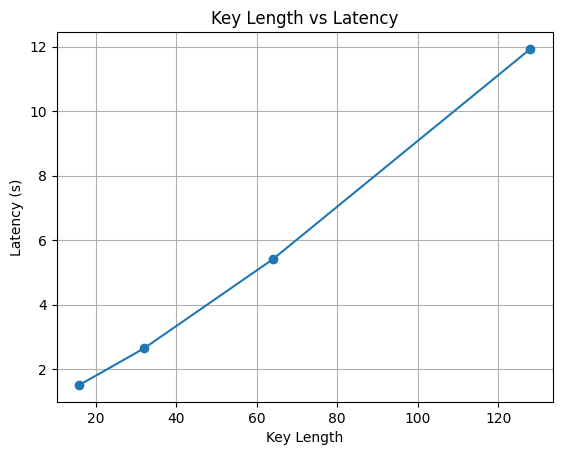

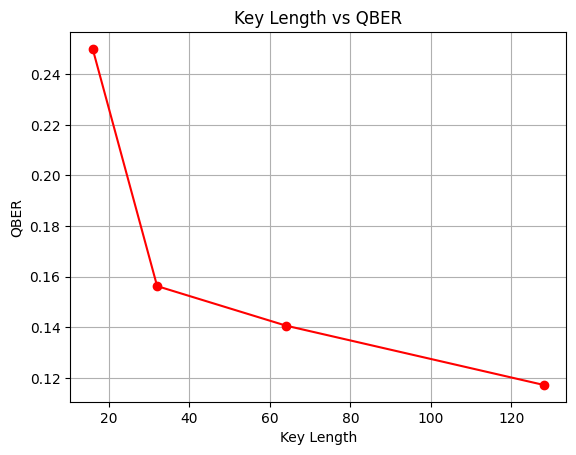

In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.backends import default_backend
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
import base64
import random
import matplotlib.pyplot as plt
import time

# Function to generate random bitstrings
def random_bitstring(length):
    return np.random.choice(['0', '1'], size=length)

# BB84 Protocol with Error Checking
def bb84_protocol_with_error_checking(length=8, error_rate=0.1):
    alice_bits = random_bitstring(length)
    alice_bases = random_bitstring(length)
    bob_bases = random_bitstring(length)
    key = []
    simulator = AerSimulator()
    errors = 0

    start_time = time.time()
    for i in range(length):
        qc = QuantumCircuit(1, 1)
        if alice_bases[i] == '0':  # Z-basis
            if alice_bits[i] == '1':
                qc.x(0)
        else:  # X-basis
            qc.h(0) if alice_bits[i] == '0'      else qc.x(0); qc.h(0)

        if bob_bases[i] == '1':
            qc.h(0)
        qc.measure(0, 0)

        compiled_circuit = transpile(qc, simulator)
        result = simulator.run(compiled_circuit).result()
        measured_bit = list(result.get_counts().keys())[0]

        # Introduce noise
        if random.random() < error_rate:
            measured_bit = '1' if measured_bit == '0' else '0'

        if alice_bases[i] == bob_bases[i]:
            key.append(measured_bit)
            if measured_bit != alice_bits[i]:
                errors += 1
    end_time = time.time()

    qber = errors / length if length > 0 else 0
    latency = end_time - start_time

    if qber > 0.1:
        print("High QBER! Possible eavesdropping detected.")
    return ''.join(key), qber, latency

# AES Encryption using QKD Key
def aes_encrypt(data, key):
    cipher = AES.new(key.encode('utf-8')[:16], AES.MODE_CBC)
    iv = cipher.iv
    ciphertext = cipher.encrypt(pad(data.encode('utf-8'), AES.block_size))
    return base64.b64encode(iv + ciphertext).decode('utf-8')

def aes_decrypt(encrypted_data, key):
    raw_data = base64.b64decode(encrypted_data)
    iv = raw_data[:AES.block_size]
    cipher = AES.new(key.encode('utf-8')[:16], AES.MODE_CBC, iv)
    plaintext = unpad(cipher.decrypt(raw_data[AES.block_size:]), AES.block_size)
    return plaintext.decode('utf-8')

# Key Padding
def pad_key(key, required_length=16):
    while len(key) < required_length:
        key += key[:required_length - len(key)]
    return key[:required_length]

# Central Authority for Key Distribution
class CentralAuthority:
    def __init__(self):
        self.keys = {}

    def distribute_key(self, node_id, length=32):  # Ensure sufficient QKD key length
        key, _, _ = bb84_protocol_with_error_checking(length=length)
        padded_key = pad_key(key)  # Pad the key to match AES key length
        self.keys[node_id] = padded_key
        print(f"Distributed Key to Node {node_id}: {padded_key}")
        return padded_key

# Smart Grid Node
class SmartGridNode:
    def __init__(self, node_id, central_authority):
        self.node_id = node_id
        self.key = central_authority.distribute_key(node_id)

    def send_message(self, message, recipient):
        encrypted_message = aes_encrypt(message, self.key)
        print(f"Node {self.node_id} -> Node {recipient.node_id}: {encrypted_message}")
        recipient.receive_message(encrypted_message, message, self.key)

    def receive_message(self, encrypted_message, original_message, sender_key):
        is_verified = aes_decrypt(encrypted_message, sender_key) == original_message
        print(f"Node {self.node_id} received data: {'Verified' if is_verified else 'Tampered'}")

# Simulate Key Length Performance
def simulate_key_length(key_lengths, error_rate=0.1):
    latencies = []
    qber_rates = []

    for length in key_lengths:
        _, qber, latency = bb84_protocol_with_error_checking(length=length, error_rate=error_rate)
        qber_rates.append(qber)
        latencies.append(latency)

    return latencies, qber_rates

# Visualization
def plot_metrics(key_lengths, latencies, qber_rates):
    # Latency vs Key Length
    plt.figure()
    plt.plot(key_lengths, latencies, marker='o')
    plt.title("Key Length vs Latency")
    plt.xlabel("Key Length")
    plt.ylabel("Latency (s)")
    plt.grid()
    plt.show()

    # QBER vs Key Length
    plt.figure()
    plt.plot(key_lengths, qber_rates, marker='o', color='red')
    plt.title("Key Length vs QBER")
    plt.xlabel("Key Length")
    plt.ylabel("QBER")
    plt.grid()
    plt.show()

# Main Simulation for Smart Grid
def quantum_cryptography_smart_grid():
    print("Starting QKD for Smart Grid...")
    raw_qkd_key, _, _ = bb84_protocol_with_error_checking(length=32)
    qkd_key = pad_key(raw_qkd_key)  # Ensure key length is valid for AES
    print(f"QKD Key: {qkd_key}")

    sample_data = "Smart Grid Status: Operational"
    print(f"Original Message: {sample_data}")
    encrypted = aes_encrypt(sample_data, qkd_key)
    print(f"Encrypted Data: {encrypted}")

    decrypted = aes_decrypt(encrypted, qkd_key)
    print(f"Decrypted Data: {decrypted}")

    # Example Nodes
    central_authority = CentralAuthority()
    node_a = SmartGridNode("A", central_authority)
    node_b = SmartGridNode("B", central_authority)
    node_a.send_message("Energy load balanced at 70%", node_b)

    # Simulate and Plot Metrics
    key_lengths = [16, 32, 64, 128]
    latencies, qber_rates = simulate_key_length(key_lengths)
    plot_metrics(key_lengths, latencies, qber_rates)

# Run the complete simulation
quantum_cryptography_smart_grid()
